In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy import interpolate, optimize
import os

In [70]:
fit_results_path = 'model_fit_results/tta_and_d/5_tta-_and_d-dependent_drift_and_bounds_and_uniformly_distributed_nondecision_time'

In [99]:
exp_data = pd.read_csv('measures.csv')
# only two data points are available for the (4, 90) condition, should ignore it altogether
exp_data.loc[(exp_data.d_condition==90) & (exp_data.tta_condition==4), 'RT'] = np.nan
subjects = exp_data.subj_id.unique()
d_conditions = np.sort(exp_data.d_condition.unique())

In [111]:
def plot_var_by_subject(data, var, ylabel):
    fig, axes = plt.subplots(2, 4, figsize=(12,6), sharex=True, sharey=True)
    ax = axes[0][0]
    ax.set_title('all subjects', fontsize=16)
    sns.pointplot(ax=axes[0][0], data=data, 
                      x='tta_condition', y=var, hue='d_condition', join=False,
                      markers=['o', 's', '^'], hue_order=d_conditions, scale=0.8, errwidth=2)

    model_measures = pd.read_csv(os.path.join(fit_results_path, 'measures.csv'))
    for d_condition, marker in zip(d_conditions, ['o', 's', '^']):
        ax.plot([0, 1, 2], model_measures.loc[model_measures.d_condition==d_condition, var], zorder=0.1)

    ax.legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')

    for subj_id, ax in zip(subjects, axes.flatten()[1:]):
        ax.set_title(subj_id, fontsize=16)
        sns.pointplot(ax=ax, data=data[data.subj_id==subj_id], 
                      x='tta_condition', y=var, hue='d_condition', join=False, dodge=True,
                      markers=['o', 's', '^'], scale=1, errwidth=2)

        subj_fit_results_path = os.path.join(fit_results_path, str(subj_id))
        subj_model_measures = pd.read_csv(os.path.join(subj_fit_results_path, 'measures.csv'))
        for d_condition, marker in zip(d_conditions, ['o', 's', '^']):
            ax.plot([0, 1, 2], subj_model_measures.loc[subj_model_measures.d_condition==d_condition, var], 
                    zorder=0.1)

        ax.legend().remove()
        ax.set_xlabel('')
        ax.set_ylabel('')

#     sns.despine(offset=1, trim=True)
    plt.tight_layout()

    legend_elements = [Line2D([0], [0], color='C0', marker='o', lw=0, label='Data, d=90m'),
                       Line2D([0], [0], color='C1', marker='s', lw=0, label='Data, d=120m'),
                       Line2D([0], [0], color='C2', marker='^', lw=0, label='Data, d=150m'),
                       Line2D([0], [0], color='grey', label='Model fits')]

    fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(1.1, 0.55), fontsize=16, frameon=False)

    fig.text(0.4, -0.05, 'time-to-arrival (TTA), s', fontsize=18)
    fig.text(-0.02, 0.3, ylabel, fontsize=18, rotation=90)

# Probability of turn

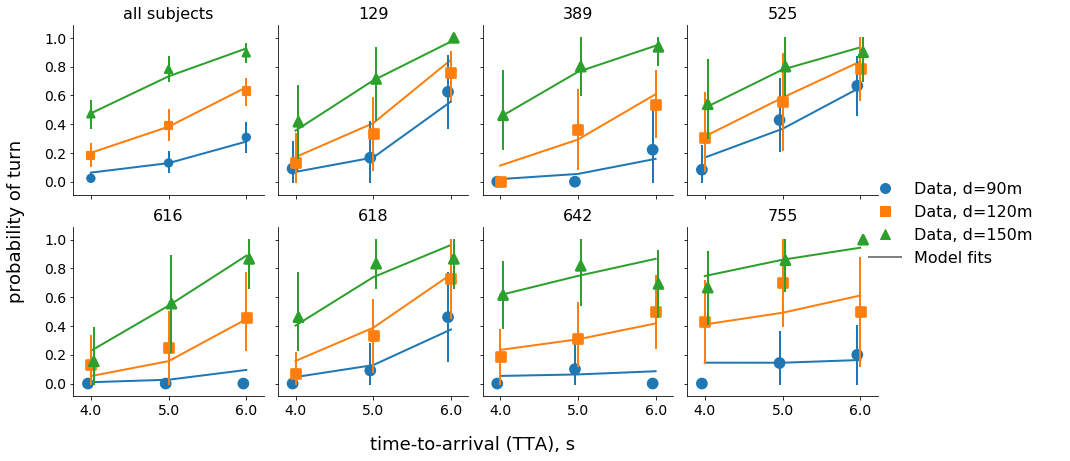

In [112]:
plot_var_by_subject(data=exp_data, var='is_turn_decision', ylabel='probability of turn')
plt.savefig('figures/p_turn.png', bbox_inches='tight')

# Response times for "turn" decisions

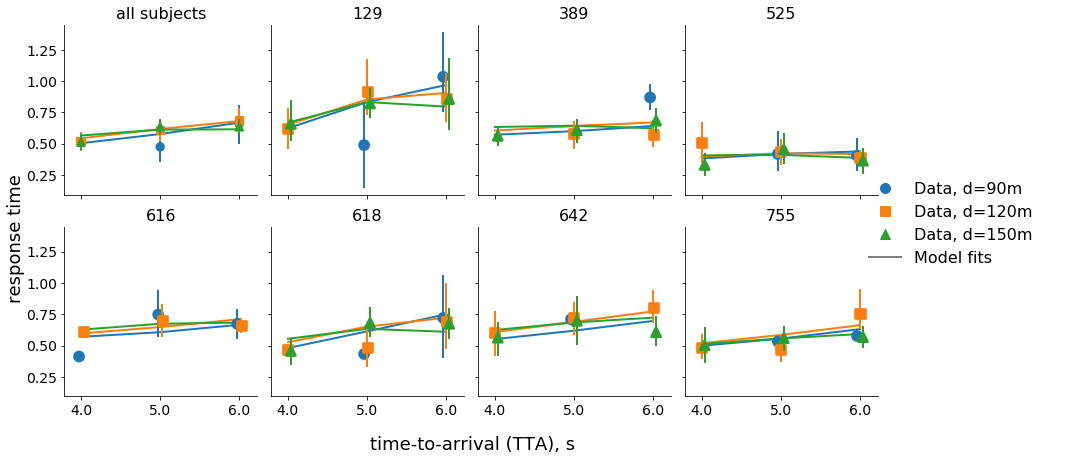

In [113]:
plot_var_by_subject(data=exp_data[exp_data.is_turn_decision], var='RT', ylabel='response time')
plt.savefig('figures/RT.png', bbox_inches='tight')

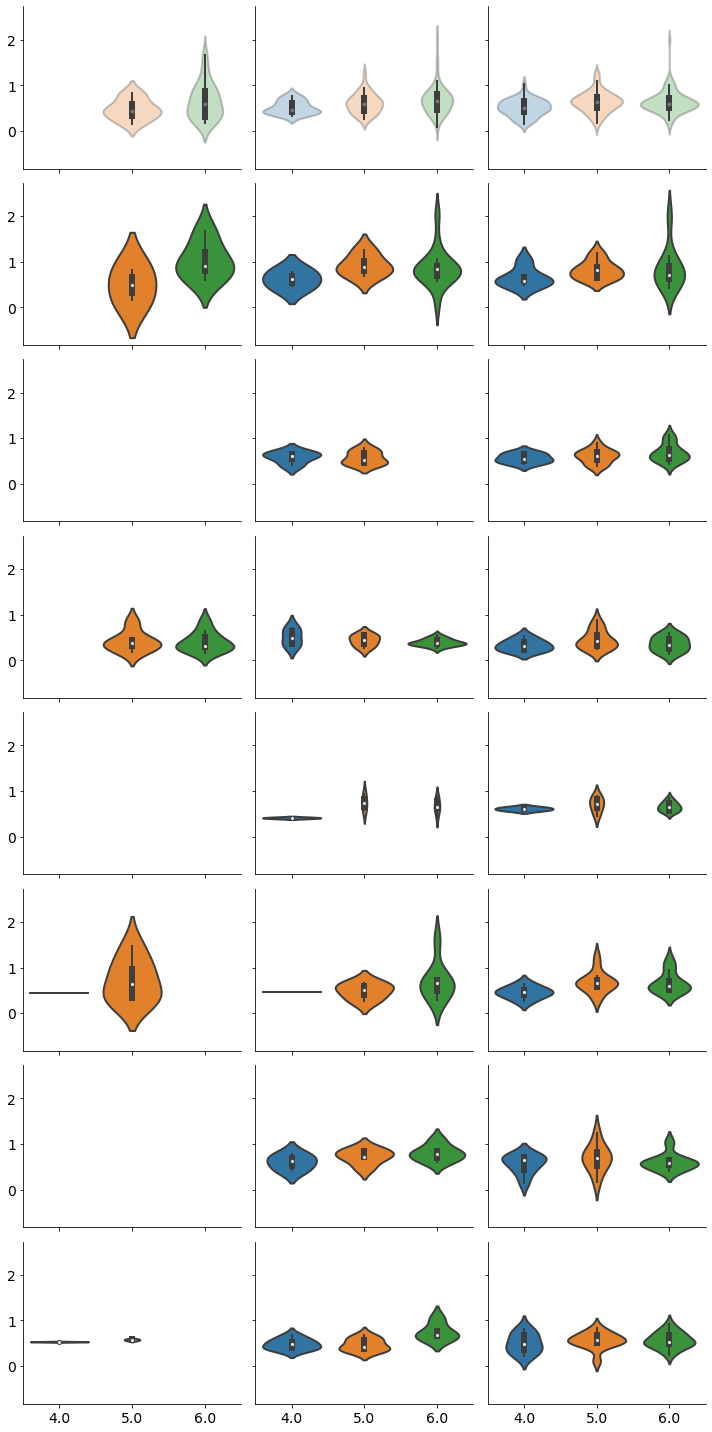

In [141]:
fig, axes = plt.subplots(8, 3, figsize=(10,20), sharex=True, sharey=True)

for d_condition, ax in zip(d_conditions, axes[0]):
    data = exp_data[(exp_data.d_condition==d_condition) &  exp_data.is_turn_decision]
    sns.violinplot(ax=ax, data=data, x='tta_condition', y='RT', split=True)
    plt.setp(ax.collections, alpha=.3)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
for subj_id, subj_axes in zip(subjects, axes[1:]):
    for d_condition, ax in zip(d_conditions, subj_axes):
#         ax.plot(range(10), np.sin(range(10)))
        data=exp_data[(exp_data.subj_id==subj_id) & (exp_data.d_condition==d_condition) &  exp_data.is_turn_decision]
        if len(data)>2:
            sns.violinplot(ax=ax, data=data, x='tta_condition', y='RT')
        ax.set_xlabel('')
        ax.set_ylabel('')
            
plt.tight_layout()